In [1]:
import os
import sys

os.chdir("..")
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from gluonts.dataset.repository.datasets import get_dataset
from statsmodels.tsa.seasonal import STL

from src.utils.transformations import manipulate_trend_component, manipulate_seasonal_determination

/home/hakon/miniforge3/envs/oodts/lib/python3.9/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [3]:
save_dir = "figures/transformations"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir, exist_ok=True)

ts = next(iter(get_dataset("m4_monthly").test))["target"][-100:]
decomp = STL(ts, period=12).fit()

f_inc = manipulate_trend_component(decomp.trend, f=2, g=1, h=1, m=0) + decomp.seasonal + decomp.resid
f_dec = manipulate_trend_component(decomp.trend, f=0.5, g=1, h=1, m=0) + decomp.seasonal + decomp.resid

h_inc = manipulate_trend_component(decomp.trend, f=1, g=1, h=5, m=0) + decomp.seasonal + decomp.resid
h_dec = manipulate_trend_component(decomp.trend, f=1, g=1, h=0.5, m=0) + decomp.seasonal + decomp.resid

m_inc = manipulate_trend_component(decomp.trend, f=1, g=1, h=1, m=0.5 / len(ts)) + decomp.seasonal + decomp.resid
m_dec = manipulate_trend_component(decomp.trend, f=1, g=1, h=1, m=-0.5 / len(ts)) + decomp.seasonal + decomp.resid

k_inc = manipulate_seasonal_determination(decomp.seasonal, k=2.5) + decomp.trend + decomp.resid
k_dec = manipulate_seasonal_determination(decomp.seasonal, k=0.1) + decomp.trend + decomp.resid

In [4]:
split_idx2 = len(ts) // 2
split_idx3 = len(ts) // 3
split_idx4 = len(ts) // 4

# f transformation
f_trend_to_change = decomp.trend[split_idx3:-split_idx3]
f_inc_trend = np.concatenate(
    [
        decomp.trend[:split_idx3],
        manipulate_trend_component(f_trend_to_change, f=2, g=1, h=1, m=0),
        decomp.trend[-split_idx3:],
    ]
)
f_inc_2 = f_inc_trend + decomp.seasonal + decomp.resid

f_dec_trend = np.concatenate(
    [
        decomp.trend[:split_idx3],
        manipulate_trend_component(f_trend_to_change, f=0.5, g=1, h=1, m=0),
        decomp.trend[-split_idx3:],
    ]
)
f_dec_2 = f_dec_trend + decomp.seasonal + decomp.resid

# h transformation
h_trend_to_change = decomp.trend[:split_idx2]
h_inc_trend = np.concatenate(
    [
        manipulate_trend_component(h_trend_to_change, f=1, g=1, h=5, m=0),
        decomp.trend[-split_idx2:],
    ]
)
h_inc_2 = h_inc_trend + decomp.seasonal + decomp.resid

h_dec_trend = np.concatenate(
    [
        manipulate_trend_component(h_trend_to_change, f=1, g=1, h=0.25, m=0),
        decomp.trend[-split_idx2:],
    ]
)
h_dec_2 = h_dec_trend + decomp.seasonal + decomp.resid

# m transformation
m_trend_to_change = decomp.trend[split_idx2:]
m_inc_trend = np.concatenate(
    [
        decomp.trend[:split_idx2],
        manipulate_trend_component(m_trend_to_change, f=1, g=1, h=1, m=2 / len(ts)),
    ]
)
m_inc_2 = m_inc_trend + decomp.seasonal + decomp.resid

m_dec_trend = np.concatenate(
    [
        decomp.trend[:split_idx2],
        manipulate_trend_component(m_trend_to_change, f=1, g=1, h=1, m=-0.5 / len(ts)),
    ]
)
m_dec_2 = m_dec_trend + decomp.seasonal + decomp.resid

# k transformation
k_season_to_change1 = decomp.seasonal[split_idx4:split_idx2]
k_season_to_change2 = decomp.seasonal[-split_idx4:]


k_inc_seasonal = np.concatenate(
    [
        decomp.seasonal[:split_idx4],
        manipulate_seasonal_determination(k_season_to_change1, k=1.5),
        decomp.seasonal[split_idx2:-split_idx4],
        manipulate_seasonal_determination(k_season_to_change2, k=1.5),
    ]
)
k_inc_2 = k_inc_seasonal + decomp.trend + decomp.resid

k_dec_seasonal = np.concatenate(
    [
        decomp.seasonal[:split_idx4],
        manipulate_seasonal_determination(k_season_to_change1, k=0.1),
        decomp.seasonal[split_idx2:-split_idx4],
        manipulate_seasonal_determination(k_season_to_change2, k=0.1),
    ]
)
k_dec_2 = k_dec_seasonal + decomp.trend + decomp.resid

# m composed with h
hm_trend_to_change = decomp.trend[split_idx2:]
hm_season_to_change = decomp.trend[split_idx2:]
hm_inc_trend = np.concatenate(
    [
        decomp.trend[:split_idx2],
        manipulate_trend_component(h_trend_to_change, f=1.5, g=1, h=1, m=0),
    ]
)
hm_inc_season = np.concatenate(
    [
        decomp.seasonal[:split_idx2],
        manipulate_seasonal_determination(hm_season_to_change, k=1.25),
    ]
)
hm_inc_2 = hm_inc_trend + hm_inc_season + decomp.resid

hm_dec_trend = np.concatenate(
    [
        decomp.trend[:split_idx2],
        manipulate_trend_component(h_trend_to_change, f=0.1, g=1, h=1, m=0),
    ]
)
hm_dec_season = np.concatenate(
    [
        decomp.seasonal[:split_idx2],
        manipulate_seasonal_determination(hm_season_to_change, k=0.1),
    ]
)
hm_dec_2 = hm_dec_trend + hm_dec_season + decomp.resid

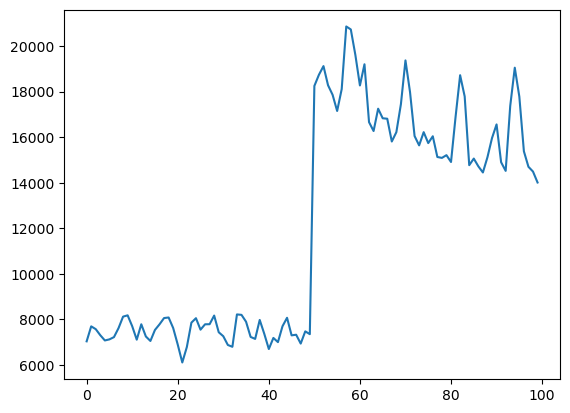

In [5]:
pre_split = ts[:split_idx2]
post_split = ts[split_idx2:] + 10000

pre_split_new_seasonal = manipulate_seasonal_determination(decomp.seasonal[:split_idx2], k=0)
pre_split_new_trend = manipulate_trend_component(decomp.trend[:split_idx2], f=0, g=1, h=1, m=0)
new_pre_split = pre_split_new_seasonal + pre_split_new_trend + decomp.resid[:split_idx2]

post_split_new_trend = manipulate_trend_component(decomp.trend[:split_idx2], f=1, g=1, h=1, m=-0.75 / len(ts))
new_post_split = post_split_new_trend + decomp.seasonal[:split_idx2] + decomp.resid[:split_idx2]
plot_31 = np.concatenate([new_pre_split, post_split])

plt.plot(plot_31)

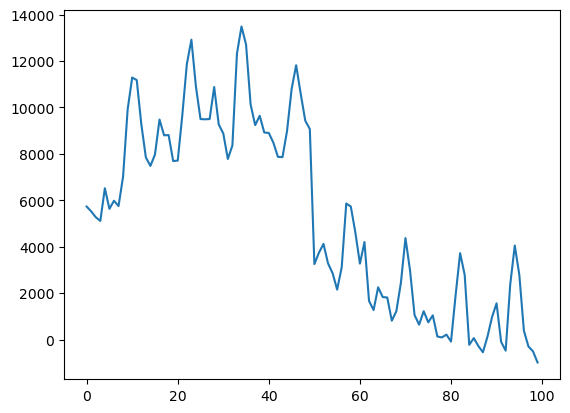

In [6]:
pre_split = ts[:split_idx2]
post_split = ts[split_idx2:] - 5000
plot_32 = np.concatenate([pre_split, post_split])
plt.plot(plot_32)

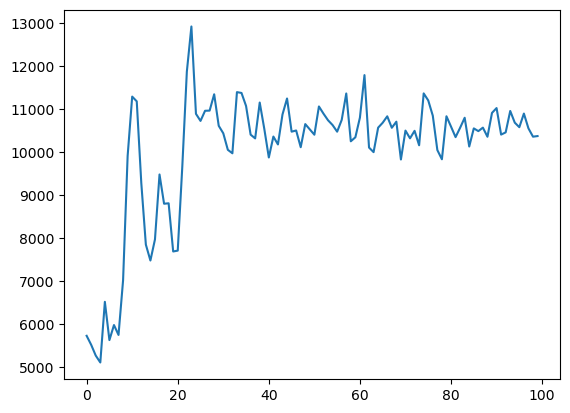

In [7]:
new_seasonal = np.concatenate(
    [
        decomp.seasonal[:split_idx4],
        manipulate_seasonal_determination(decomp.seasonal[split_idx4:], k=0),
    ]
)
new_trend = np.concatenate(
    [
        decomp.trend[:split_idx4],
        manipulate_trend_component(
            decomp.trend[split_idx4:], f=0, g=1, h=1, m=0
        ),
    ]
)
plot_33 = new_trend + new_seasonal + decomp.resid

plt.plot(plot_33)

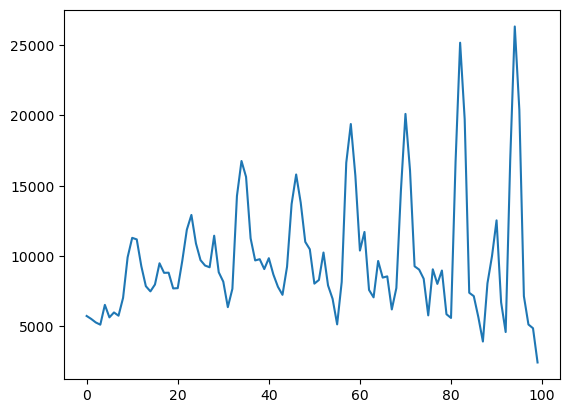

In [8]:
new_seasonal = np.concatenate(
    [
        decomp.seasonal[:split_idx4],
        manipulate_seasonal_determination(decomp.seasonal[split_idx4:- (2 * split_idx4)], k=2),
        manipulate_seasonal_determination(decomp.seasonal[(2 * split_idx4):-split_idx4], k=3.5),
        manipulate_seasonal_determination(decomp.seasonal[-split_idx4:], k=5),
    ]
)
new_trend = np.concatenate(
    [
        decomp.trend[:split_idx4],
        manipulate_trend_component(
            decomp.trend[split_idx4:], f=0, g=1, h=1, m=0
        ),
    ]
)
plot_34 = new_trend + new_seasonal + decomp.resid

plt.plot(plot_34)

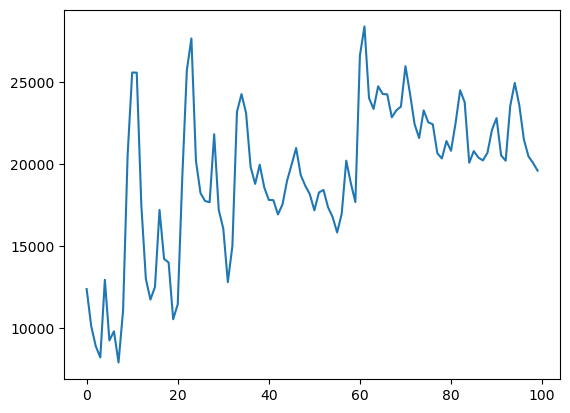

In [9]:
new_seasonal = np.concatenate(
    [
        manipulate_seasonal_determination(decomp.seasonal[:split_idx3], k=2.5),
        manipulate_seasonal_determination(decomp.seasonal[split_idx3:], k=0),
    ]
)
new_trend = np.concatenate(
    [
        manipulate_trend_component(
            decomp.trend[:split_idx4], f=0, g=1, h=1, m=1 / len(ts)
        ),
        decomp.trend[split_idx4:]
    ]
)

new_level = ts.copy()
new_level[10 + len(ts) // 2:] += 10000

plot_35 = new_trend + new_seasonal + decomp.resid + new_level

plt.plot(plot_35)

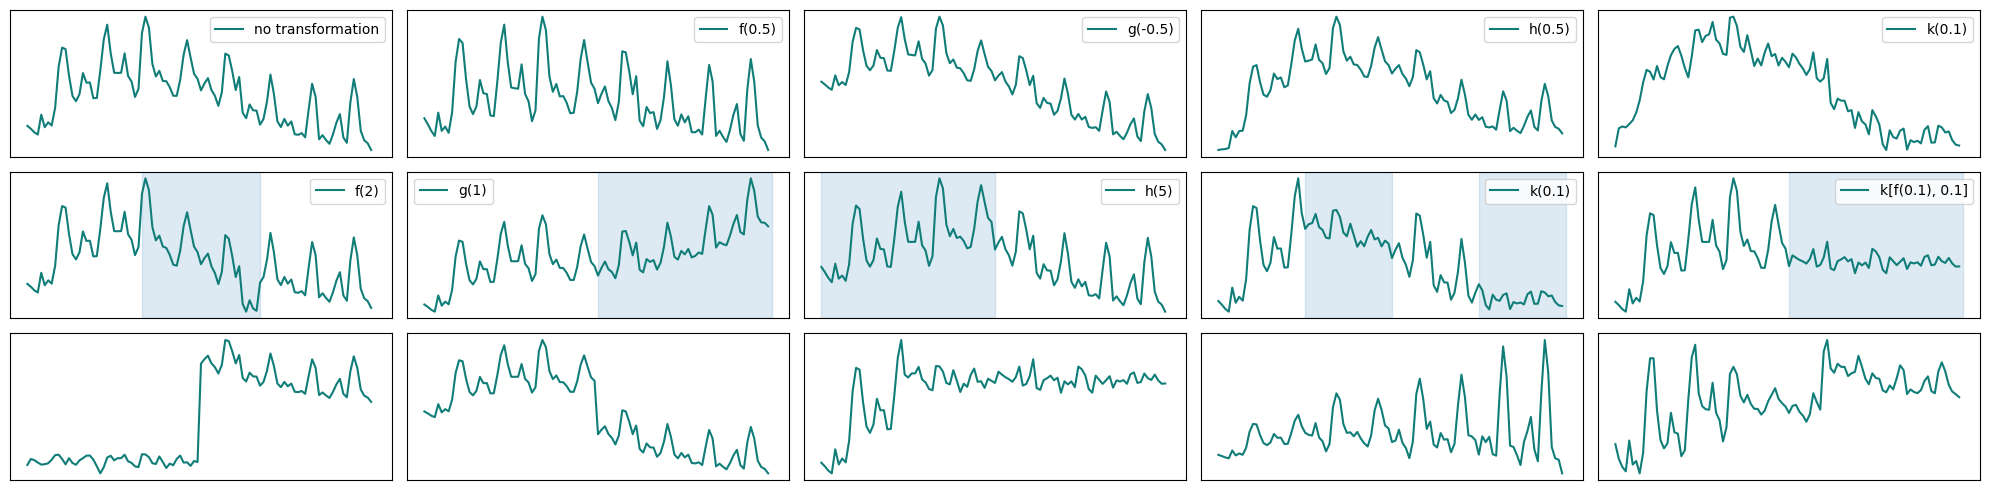

In [ ]:
_, (row1, row2, row3) = plt.subplots(3, 5, figsize=(20, 5), sharex=True, tight_layout=True)

# Row 1
# row1[0].set_ylabel("Global transformations", rotation="horizontal")
row1[0].plot(ts, color="#107D79", label="no transformation")
row1[0].set_xticks([])
row1[0].set_yticks([])
row1[0].legend()

# row1[1].plot(f_inc, color="C1", label="f(2)")
row1[1].plot(f_dec, color="#107D79", label="f(0.5)")
row1[1].set_xticks([])
row1[1].set_yticks([])
row1[1].legend()

# row1[2].plot(m_inc, color="C1", label="g(0.5)")
row1[2].plot(m_dec, color="#107D79", label="g(-0.5)")
row1[2].set_xticks([])
row1[2].set_yticks([])
row1[2].legend()

# row1[3].plot(h_inc, color="C1", label="h(5)")
row1[3].plot(h_dec, color="#107D79", label="h(0.5)")
row1[3].set_xticks([])
row1[3].set_yticks([])
row1[3].legend()

# row1[4].plot(k_inc, color="C1", label="k(2.5)")
row1[4].plot(k_dec, color="#107D79", label="k(0.1)")
row1[4].set_xticks([])
row1[4].set_yticks([])
row1[4].legend()



# Row 2
# row2[0].set_ylabel("Local transformations", rotation="horizontal")
row2[0].plot(f_inc_2, color="#107D79", label="f(2)")
# row2[0].plot(f_dec_2, color="#C1", label="f(0.5)")
row2[0].axvspan(split_idx3, len(ts) - split_idx3, color="C0", alpha=0.15)
row2[0].set_xticks([])
row2[0].set_yticks([])
row2[0].legend()

row2[1].plot(m_inc_2, color="#107D79", label="g(1)")
# row2[1].plot(m_dec_2, color="C1")
row2[1].axvspan(split_idx2, len(ts), color="C0", alpha=0.15)
row2[1].set_xticks([])
row2[1].set_yticks([])
row2[1].legend()

row2[2].plot(h_inc_2, color="#107D79", label="h(5)")
# row2[2].plot(h_dec_2, color="C1")
row2[2].axvspan(0, split_idx2, color="C0", alpha=0.15)
row2[2].set_xticks([])
row2[2].set_yticks([])
row2[2].legend()

# row2[3].plot(k_inc_2, color="C1", label="k(1.5)")
row2[3].plot(k_dec_2, color="#107D79", label="k(0.1)")
row2[3].axvspan(split_idx4, split_idx2, color="C0", alpha=0.15)
row2[3].axvspan(len(ts) - split_idx4, len(ts), color="C0", alpha=0.15)
row2[3].set_xticks([])
row2[3].set_yticks([])
row2[3].legend()

# row2[4].plot(hm_inc_2, color="C1")
row2[4].plot(hm_dec_2, color="#107D79", label="k[f(0.1), 0.1]")
row2[4].axvspan(split_idx2, len(ts), color="C0", alpha=0.15)
row2[4].set_xticks([])
row2[4].set_yticks([])
row2[4].legend()



# Row 3
# row3[0].set_ylabel("Arbitrary transformations", rotation="horizontal")
row3[0].plot(plot_31, color="#107D79")
row3[0].set_xticks([])
row3[0].set_yticks([])

row3[1].plot(plot_32, color="#107D79")
row3[1].set_xticks([])
row3[1].set_yticks([])

row3[2].plot(plot_33, color="#107D79")
row3[2].set_xticks([])
row3[2].set_yticks([])

row3[3].plot(plot_34, color="#107D79")
row3[3].set_xticks([])
row3[3].set_yticks([])

row3[4].plot(plot_35, color="#107D79")
row3[4].set_xticks([])
row3[4].set_yticks([])

plt.savefig("./figures/transformations/transformations.svg")